In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
application_data['DAYS_REGISTRATION']=application_data['DAYS_REGISTRATION'].abs()
application_data['DAYS_ID_PUBLISH']=application_data['DAYS_ID_PUBLISH'].abs()
application_data['DAYS_LAST_PHONE_CHANGE']=application_data['DAYS_LAST_PHONE_CHANGE'].abs()
application_data['DAYS_BIRTH']=application_data['DAYS_BIRTH'].abs()
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].abs()
application_data['DAYS_BIRTH']=application_data['DAYS_BIRTH'].abs()



# Predictive Modeling


## removing columns with null value more then 30%


In [3]:
# Calculate the percentage of null values for each column
null_percentage = application_data.isnull().mean() * 100

# Display columns with their null percentage
null_percentage.sort_values(ascending=False).head(60)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [4]:
# Remove columns with more than 30% null values
threshold = 30
application_data = application_data.loc[:, application_data.isnull().mean() * 100 < threshold]

# Display the shape to verify the number of columns after removal
print("Data shape after removing columns with >30% null values:", application_data.shape)


Data shape after removing columns with >30% null values: (307511, 72)


###  finding correlation between the data set's columns so that the will remove redundency

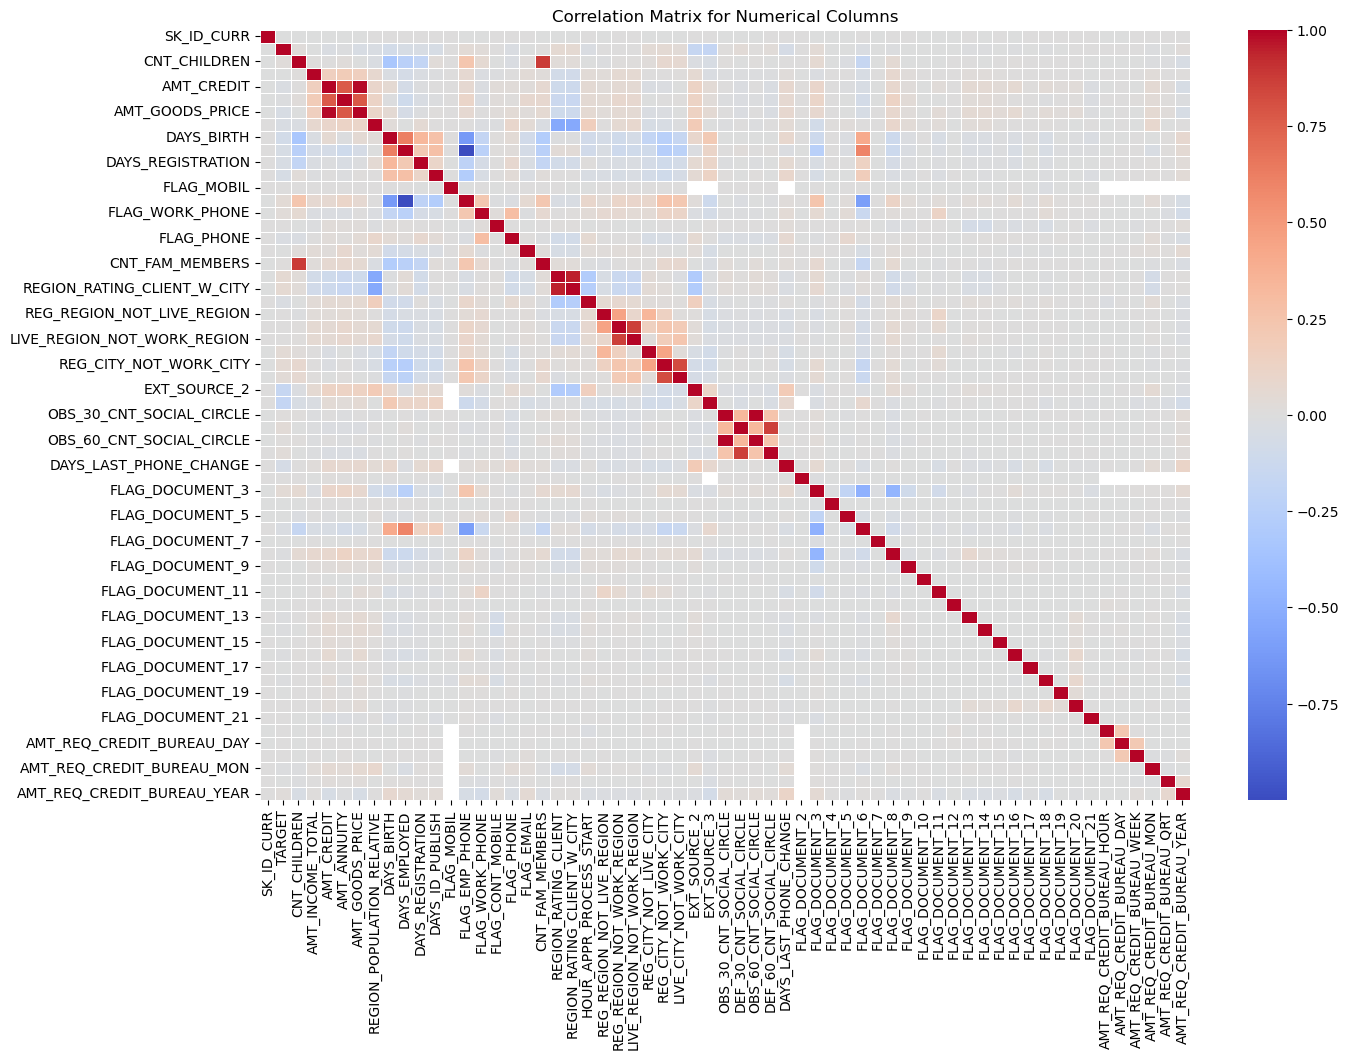

In [5]:
# Select only numerical columns
numerical_data = application_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()


In [6]:
correlation_threshold = 0.8
correlation_matrix = numerical_data.corr().abs()  # Absolute correlation values
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Drop highly correlated features
filtered_data = application_data.drop(columns=to_drop)

print("Removed features:", to_drop)
print("Remaining features after removing highly correlated ones:", filtered_data.columns)


Removed features: ['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
Remaining features after removing highly correlated ones: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATI

## let's now see the null values here

In [7]:
# Calculate percentage of null values for each column
null_percentage = filtered_data.isnull().sum() * 100 / len(filtered_data)

# Filter and display columns with non-zero null values
null_columns = null_percentage[null_percentage > 0].sort_values(ascending=False)
print("Percentage of missing values in each column:")
print(null_columns)


Percentage of missing values in each column:
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_ANNUITY                    0.003902
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


In [8]:
filtered_data.shape

(307511, 64)

## lets take a sample from the data so thet we can perform modeling over that and can train a model 

In [9]:
target_distribution=filtered_data['TARGET'].value_counts()/filtered_data['TARGET'].count()*100
target_distribution

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

In [10]:
non_defaulter=filtered_data[filtered_data['TARGET']==0]
defaulter=filtered_data[filtered_data['TARGET']==1]


non_defaulter.shape,defaulter.shape

((282686, 64), (24825, 64))

In [11]:
from sklearn.utils import resample

down_sampled_non_defaulters = resample(non_defaulter, replace=False, n_samples=25000, random_state=42)
down_sampled_defaulters = resample(defaulter, replace=False, n_samples=24000, random_state=42)

down_sampled_non_defaulters.shape, down_sampled_defaulters.shape

((25000, 64), (24000, 64))

## creating a new data set from the sampled data

In [12]:
balanced_application= pd.concat([down_sampled_defaulters,down_sampled_non_defaulters])
balanced_application = balanced_application.sample(frac=1, random_state=42).reset_index(drop=True) 

In [13]:
balanced_application.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196491,0,Cash loans,F,Y,N,1,180000.0,797557.5,26487.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,178011,0,Cash loans,M,Y,Y,1,180000.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
2,170702,0,Cash loans,F,N,Y,0,171000.0,312768.0,24691.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
3,106289,0,Cash loans,F,N,Y,0,33300.0,359685.0,15237.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
balanced_application.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7484
AMT_REQ_CREDIT_BUREAU_WEEK    7484
AMT_REQ_CREDIT_BUREAU_MON     7484
AMT_REQ_CREDIT_BUREAU_QRT     7484
AMT_REQ_CREDIT_BUREAU_YEAR    7484
Length: 64, dtype: int64

In [15]:
abc=balanced_application[balanced_application['AMT_REQ_CREDIT_BUREAU_HOUR'].isna()]

In [16]:
abc.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7484
AMT_REQ_CREDIT_BUREAU_WEEK    7484
AMT_REQ_CREDIT_BUREAU_MON     7484
AMT_REQ_CREDIT_BUREAU_QRT     7484
AMT_REQ_CREDIT_BUREAU_YEAR    7484
Length: 64, dtype: int64

In [17]:
balanced_application = balanced_application.dropna(subset=['AMT_REQ_CREDIT_BUREAU_HOUR'])

balanced_application.shape


(41516, 64)

### still 41516 records are good to perform logistic regression

In [18]:
balanced_application.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 64, dtype: int64

In [19]:
balanced_application.dropna(inplace=True)

In [20]:
balanced_application.shape


(38301, 64)

In [21]:
balanced_application['TARGET'].value_counts()

TARGET
0    19916
1    18385
Name: count, dtype: int64

## let's find unique values in the columns

In [22]:
# Display unique values for each column
for col in balanced_application.columns:
    unique_values = balanced_application[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values[:10]}")  # Display first 10 unique values
    print(f"Number of Unique Values: {len(unique_values)}")
    print("-" * 150)


Column: SK_ID_CURR
Unique Values: [196491 178011 269366 172269 218234 208091 105593 426142 358585 280135]
Number of Unique Values: 38301
------------------------------------------------------------------------------------------------------------------------------------------------------
Column: TARGET
Unique Values: [0 1]
Number of Unique Values: 2
------------------------------------------------------------------------------------------------------------------------------------------------------
Column: NAME_CONTRACT_TYPE
Unique Values: ['Cash loans' 'Revolving loans']
Number of Unique Values: 2
------------------------------------------------------------------------------------------------------------------------------------------------------
Column: CODE_GENDER
Unique Values: ['F' 'M' 'XNA']
Number of Unique Values: 3
------------------------------------------------------------------------------------------------------------------------------------------------------
Column: FLAG_OWN

In [23]:
balanced_application.isnull().sum().sum()

0

## here some other gender can be seen lets just remove them XNA

In [24]:
# Remove rows where CODE_GENDER is 'XNA'
balanced_application = balanced_application[balanced_application['CODE_GENDER'] != 'XNA']

# Verify removal
print(balanced_application['CODE_GENDER'].value_counts())


CODE_GENDER
F    24055
M    14245
Name: count, dtype: int64


## let's remove the id to decrese cardinality

In [25]:
balanced_application=balanced_application.drop(columns='SK_ID_CURR')

In [26]:
balanced_application.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,Cash loans,F,Y,N,1,180000.0,797557.5,26487.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,M,Y,Y,1,180000.0,521280.0,28408.5,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
4,1,Cash loans,M,Y,N,2,135000.0,1442952.0,39811.5,"Spouse, partner",...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
5,0,Cash loans,M,N,N,0,135000.0,497520.0,52371.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6,1,Cash loans,M,N,Y,2,292500.0,1256400.0,36864.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


## treating the outliers

In [27]:
# Function to treat outliers using IQR method
def treat_outliers(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)
    return df



balanced_application=treat_outliers(balanced_application)

## encoding categorical columns to convert it into numerical data 

In [28]:
category_mapping = {}

for col in balanced_application.select_dtypes(include='object').columns:
    cat = pd.Categorical(balanced_application[col])
    balanced_application[col] = cat.codes
    category_mapping[col] = dict(enumerate(cat.categories))

print(category_mapping)


{'NAME_CONTRACT_TYPE': {0: 'Cash loans', 1: 'Revolving loans'}, 'CODE_GENDER': {0: 'F', 1: 'M'}, 'FLAG_OWN_CAR': {0: 'N', 1: 'Y'}, 'FLAG_OWN_REALTY': {0: 'N', 1: 'Y'}, 'NAME_TYPE_SUITE': {0: 'Children', 1: 'Family', 2: 'Group of people', 3: 'Other_A', 4: 'Other_B', 5: 'Spouse, partner', 6: 'Unaccompanied'}, 'NAME_INCOME_TYPE': {0: 'Commercial associate', 1: 'Pensioner', 2: 'State servant', 3: 'Student', 4: 'Working'}, 'NAME_EDUCATION_TYPE': {0: 'Academic degree', 1: 'Higher education', 2: 'Incomplete higher', 3: 'Lower secondary', 4: 'Secondary / secondary special'}, 'NAME_FAMILY_STATUS': {0: 'Civil marriage', 1: 'Married', 2: 'Separated', 3: 'Single / not married', 4: 'Widow'}, 'NAME_HOUSING_TYPE': {0: 'Co-op apartment', 1: 'House / apartment', 2: 'Municipal apartment', 3: 'Office apartment', 4: 'Rented apartment', 5: 'With parents'}, 'WEEKDAY_APPR_PROCESS_START': {0: 'FRIDAY', 1: 'MONDAY', 2: 'SATURDAY', 3: 'SUNDAY', 4: 'THURSDAY', 5: 'TUESDAY', 6: 'WEDNESDAY'}, 'ORGANIZATION_TYPE': 

#### Seprating 'x' variable & 'y' variable

In [29]:
x = balanced_application.drop(columns=['TARGET'])
y = balanced_application['TARGET']

## standardizing the data set

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [31]:
x_scaled= ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled)

In [32]:
x_scaled.columns=x.columns
x_scaled.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.293207,-0.769535,1.412111,-1.476038,0.801382,0.228312,0.588927,-0.018140,0.425262,-1.446715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.515919
1,-0.293207,1.299486,1.412111,0.677490,0.801382,0.228312,-0.178188,0.134810,0.425262,-1.446715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.515919
2,-0.293207,1.299486,1.412111,-1.476038,2.223998,-0.397125,2.380936,1.042482,-0.151043,0.859023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027916
3,-0.293207,1.299486,-0.708159,-1.476038,-0.621234,-0.397125,-0.244160,2.042211,0.425262,0.859023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027916
4,-0.293207,1.299486,-0.708159,0.677490,2.223998,1.791903,1.862954,0.807863,0.425262,0.859023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.659420


### Model_1: Simple Randomforest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model using all features
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

M1_accuracy=accuracy_score(y_test, y_pred)*100
M1_Classification_Report=classification_report(y_test, y_pred)

# Evaluate the model's performance
print("Accuracy Score:", M1_accuracy)
print("\nClassification Report:\n", M1_Classification_Report )



Accuracy Score: 68.23759791122716

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      3946
           1       0.69      0.62      0.66      3714

    accuracy                           0.68      7660
   macro avg       0.68      0.68      0.68      7660
weighted avg       0.68      0.68      0.68      7660



## Model 2: Domain Knowledge Features (Random Forest)


In [34]:
# Using a limited set of features
data_2_balanced_data = x_scaled[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                                'DAYS_REGISTRATION', 'REGION_RATING_CLIENT','NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                                'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']]

X2 = data_2_balanced_data
y2 = y

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_2 = RandomForestClassifier(random_state=42)

# Train the model using selected features
model_2.fit(X2_train, y2_train)

# Make predictions on the test set
y_pred_2 = model_2.predict(X2_test)

M2_accuracy = accuracy_score(y2_test, y_pred_2) * 100
M2_Classification_Report = classification_report(y2_test, y_pred_2)

# Evaluate the model's performance
print("Model 2 - Accuracy Score:", M2_accuracy)
print("\nModel 2 - Classification Report:\n", M2_Classification_Report)


Model 2 - Accuracy Score: 61.34464751958224

Model 2 - Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      3946
           1       0.62      0.53      0.57      3714

    accuracy                           0.61      7660
   macro avg       0.61      0.61      0.61      7660
weighted avg       0.61      0.61      0.61      7660



## Model 3: Top Correlated Features (Random Forest)


Top 20 Features Correlated with the Target Variable:
                             NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
NAME_CONTRACT_TYPE                    1.000000    -0.021348      0.003963   
CODE_GENDER                          -0.021348     1.000000      0.334829   
FLAG_OWN_CAR                          0.003963     0.334829      1.000000   
FLAG_OWN_REALTY                       0.067236    -0.040903      0.013389   
CNT_CHILDREN                          0.026066     0.040803      0.094344   
AMT_INCOME_TOTAL                     -0.055334     0.207823      0.212038   
AMT_CREDIT                           -0.236252     0.008930      0.102313   
AMT_ANNUITY                          -0.280447     0.079076      0.140631   
NAME_TYPE_SUITE                       0.011054     0.023740     -0.000818   
NAME_INCOME_TYPE                      0.010000     0.072475      0.033158   
NAME_EDUCATION_TYPE                  -0.043643     0.014766     -0.089624   
NAME_FAMILY_STATUS    

<Axes: >

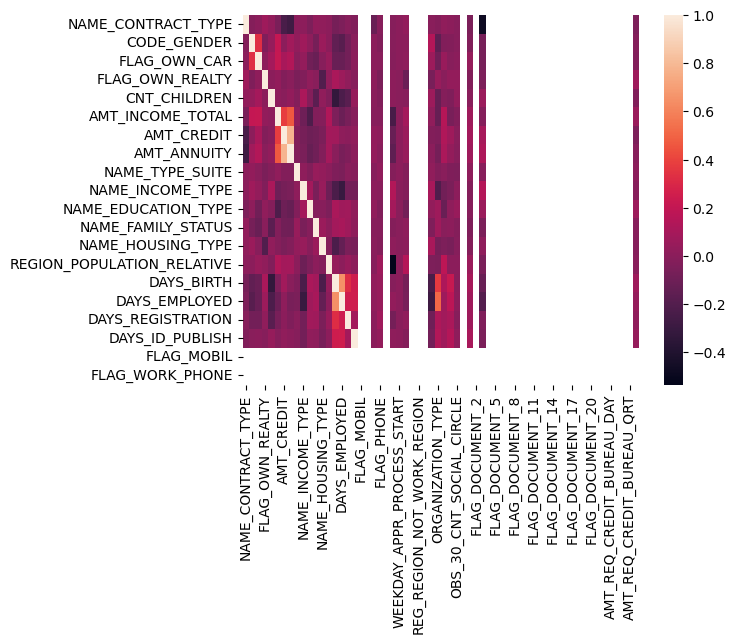

In [35]:
# Calculate the correlation matrix for the cleaned dataset
correlation_matrix = x_scaled.corr()

# Display the top 20 most correlated features with the target variable
print("Top 20 Features Correlated with the Target Variable:\n", correlation_matrix.head(20))

sns.heatmap(data=correlation_matrix.head(20))

In [36]:
# Using top correlated features
keep_col = list(correlation_matrix.reset_index().head(20).iloc[:, 0])
data_3_cleaned = x[keep_col]

X3 = data_3_cleaned
y3 = y

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_3 = RandomForestClassifier(random_state=42)

# Train the model using top correlated features
model_3.fit(X3_train, y3_train)

# Make predictions on the test set
y_pred_3 = model_3.predict(X3_test)

M3_accuracy = accuracy_score(y3_test, y_pred_3) * 100
M3_Classification_Report = classification_report(y3_test, y_pred_3)

# Evaluate the model's performance
print("Model 3 - Accuracy Score:", M3_accuracy)
print("\nModel 3 - Classification Report:\n", M3_Classification_Report)


Model 3 - Accuracy Score: 60.77023498694517

Model 3 - Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.64      3946
           1       0.61      0.52      0.56      3714

    accuracy                           0.61      7660
   macro avg       0.61      0.61      0.60      7660
weighted avg       0.61      0.61      0.61      7660



### Model_4: GRIDsearch + Random Forest


In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X4_train, X4_test, y4_train, y4_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid={})
grid_search.fit(X4_train, y4_train)

best_model = grid_search.best_estimator_

y4_pred = best_model.predict(X4_test)

M4_accuracy = accuracy_score(y4_test, y4_pred) * 100
M4_classification_report=classification_report(y4_test, y4_pred)

print(" Model_4 Accuracy Score:", M4_accuracy)
print("\n Model_4 Classification Report:\n",M4_classification_report )


 Model_4 Accuracy Score: 68.23759791122716

 Model_4 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      3946
           1       0.69      0.62      0.66      3714

    accuracy                           0.68      7660
   macro avg       0.68      0.68      0.68      7660
weighted avg       0.68      0.68      0.68      7660



## Model_5:  Random forest + PCA  

In [38]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Let's retain enough components to explain 95% of the variance in the data
pca = PCA(n_components=0.95)  # This means we'll keep enough components to explain 95% of the variance
X_pca = pca.fit_transform(x_scaled)

# Check how many components were chosen
print(f'Number of components chosen by PCA: {X_pca.shape[1]}')

X5_train_pca, X5_test_pca, y5_train, y5_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = RandomForestClassifier(random_state=42)

model_pca.fit(X5_train_pca, y5_train)

y5_pred_pca = model_pca.predict(X5_test_pca)


M5_accuracy = accuracy_score(y5_test, y5_pred_pca) * 100
M5_classification_report=classification_report(y5_test, y5_pred_pca)


print(" Model_5 Accuracy Score:", M5_accuracy)
print("\n Model_5 Classification Report:\n", M5_classification_report)


Number of components chosen by PCA: 27
 Model_5 Accuracy Score: 67.45430809399477

 Model_5 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70      3946
           1       0.68      0.61      0.65      3714

    accuracy                           0.67      7660
   macro avg       0.68      0.67      0.67      7660
weighted avg       0.68      0.67      0.67      7660



### Model_6: Logistic+pca

In [39]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Set the number of components to explain a certain percentage of variance, e.g., 95%
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(x_scaled)

print(f'Number of components chosen by PCA: {X_pca.shape[1]}')

X6_train_pca, X6_test_pca, y6_train, y6_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)

logistic_model.fit(X6_train_pca, y6_train)

y6_pred_pca = logistic_model.predict(X6_test_pca)


M6_accuracy = accuracy_score(y6_test, y6_pred_pca)*100
M6_classification_report=classification_report(y6_test, y6_pred_pca)


print(" Model_6 Accuracy Score:", M6_accuracy)
print("\n Model_6 Classification Report:\n", M6_classification_report)


Number of components chosen by PCA: 27
 Model_6 Accuracy Score: 68.51174934725849

 Model_6 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70      3946
           1       0.69      0.64      0.66      3714

    accuracy                           0.69      7660
   macro avg       0.69      0.68      0.68      7660
weighted avg       0.69      0.69      0.68      7660



In [40]:
print("Model_1 : Accuracy Score:", M1_accuracy)
print("Model_2 : Accuracy Score:", M2_accuracy)
print("Model_3 : Accuracy Score:", M3_accuracy)
print("Model_4 : Accuracy Score:", M4_accuracy)
print("Model_5 : Accuracy Score:", M5_accuracy)
print("Model_6 : Accuracy Score:", M6_accuracy)


Model_1 : Accuracy Score: 68.23759791122716
Model_2 : Accuracy Score: 61.34464751958224
Model_3 : Accuracy Score: 60.77023498694517
Model_4 : Accuracy Score: 68.23759791122716
Model_5 : Accuracy Score: 67.45430809399477
Model_6 : Accuracy Score: 68.51174934725849


### Model_6: Logistic+pca equation

In [41]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming x_scaled is your standardized feature matrix

# Step 1: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(x_scaled)

# Step 2: Train Logistic Regression on PCA-transformed data
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_pca, y)  # Assuming 'y' is the target

# Step 3: Get the logistic regression coefficients for principal components
pca_logistic_coefficients = logistic_model.coef_.flatten()

# Step 4: Map the coefficients back to the original features
# Multiply logistic regression coefficients by the PCA components matrix
original_feature_influence = np.dot(pca_logistic_coefficients, pca.components_)

# Step 5: Create a DataFrame to display influence of each original feature
feature_names = x.columns if isinstance(x, pd.DataFrame) else [f'Feature {i+1}' for i in range(x_scaled.shape[1])]
influence_df = pd.DataFrame({
    'Feature': feature_names,
    'Influence': original_feature_influence
}).sort_values(by='Influence', ascending=False)

# Display top influences
print("Top Positive Influences:\n", influence_df.head(10))
print("\nTop Negative Influences:\n", influence_df.tail(10))


Top Positive Influences:
                        Feature  Influence
1                  CODE_GENDER   0.206026
10         NAME_EDUCATION_TYPE   0.186480
23        REGION_RATING_CLIENT   0.050134
37             FLAG_DOCUMENT_3   0.041282
9             NAME_INCOME_TYPE   0.040583
61  AMT_REQ_CREDIT_BUREAU_YEAR   0.035421
7                  AMT_ANNUITY   0.032784
3              FLAG_OWN_REALTY   0.028906
12           NAME_HOUSING_TYPE   0.027995
29      REG_CITY_NOT_WORK_CITY   0.021414

Top Negative Influences:
                    Feature  Influence
17         DAYS_ID_PUBLISH  -0.039416
21              FLAG_PHONE  -0.041580
35  DAYS_LAST_PHONE_CHANGE  -0.053773
5         AMT_INCOME_TOTAL  -0.053843
15           DAYS_EMPLOYED  -0.078833
14              DAYS_BIRTH  -0.122695
0       NAME_CONTRACT_TYPE  -0.130096
2             FLAG_OWN_CAR  -0.134463
31            EXT_SOURCE_2  -0.424887
32            EXT_SOURCE_3  -0.603258


## for model 1 random forest


Accuracy Score: 68.23759791122716

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      3946
           1       0.69      0.62      0.66      3714

    accuracy                           0.68      7660
   macro avg       0.68      0.68      0.68      7660
weighted avg       0.68      0.68      0.68      7660


Feature Importance with Column Names:
                        Feature  Importance
32                EXT_SOURCE_3    0.121069
31                EXT_SOURCE_2    0.093478
14                  DAYS_BIRTH    0.060848
15               DAYS_EMPLOYED    0.059963
17             DAYS_ID_PUBLISH    0.057470
16           DAYS_REGISTRATION    0.056728
7                  AMT_ANNUITY    0.054880
35      DAYS_LAST_PHONE_CHANGE    0.054477
6                   AMT_CREDIT    0.054277
13  REGION_POPULATION_RELATIVE    0.047955


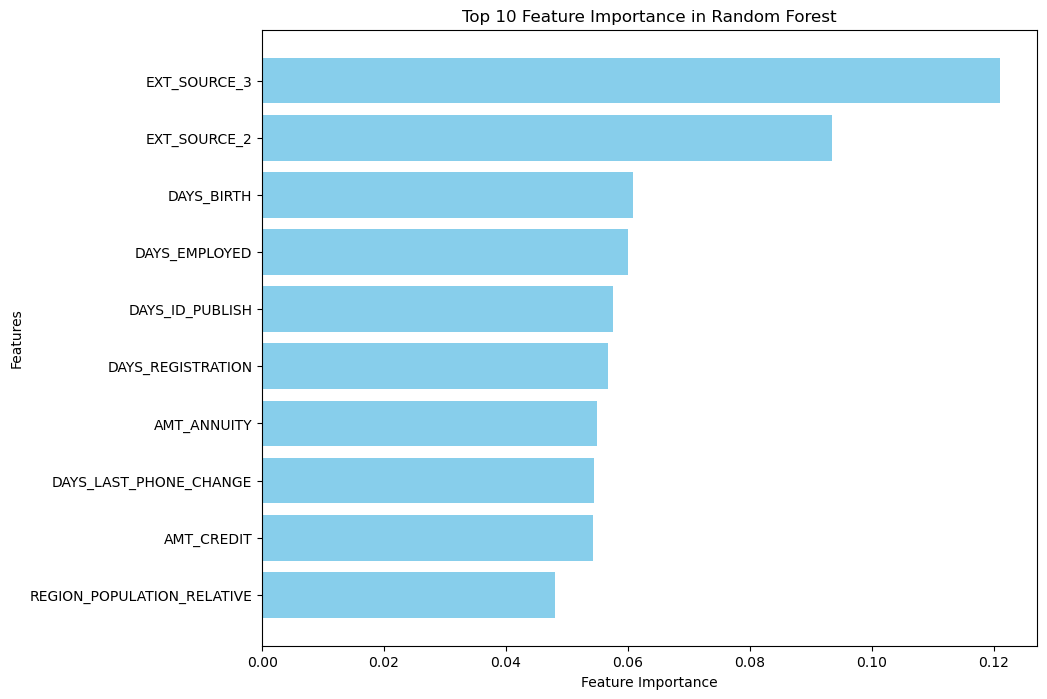


Top 10 Features by Permutation Importance:
                        Feature  Permutation Importance
32                EXT_SOURCE_3                0.074413
31                EXT_SOURCE_2                0.038616
15               DAYS_EMPLOYED                0.006201
10         NAME_EDUCATION_TYPE                0.004896
9             NAME_INCOME_TYPE                0.004608
13  REGION_POPULATION_RELATIVE                0.004191
6                   AMT_CREDIT                0.004151
35      DAYS_LAST_PHONE_CHANGE                0.004099
14                  DAYS_BIRTH                0.003277
1                  CODE_GENDER                0.003185


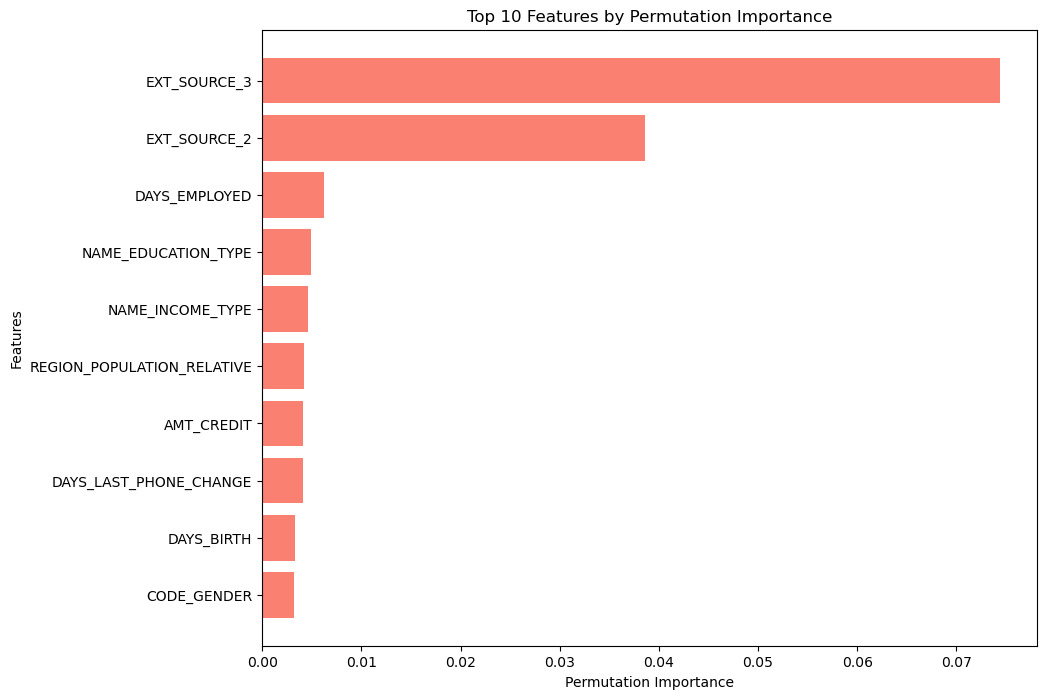

In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model using all features
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
M1_accuracy = accuracy_score(y_test, y_pred) * 100
M1_Classification_Report = classification_report(y_test, y_pred)
print("Accuracy Score:", M1_accuracy)
print("\nClassification Report:\n", M1_Classification_Report)

# Retrieve feature importances
feature_importances = model.feature_importances_

# Get column names from the DataFrame or assign names if x_scaled is a numpy array
feature_names = x.columns if isinstance(x, pd.DataFrame) else [f'Feature {i+1}' for i in range(x_scaled.shape[1])]

# Create a DataFrame for feature names and their corresponding importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importance with Column Names:\n", importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

# Calculate permutation importance for better insight
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importances
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Permutation Importance': perm_importance.importances_mean
}).sort_values(by='Permutation Importance', ascending=False)

# Display top 10 features based on permutation importance
print("\nTop 10 Features by Permutation Importance:\n", perm_importance_df.head(10))

# Plot permutation importances
plt.figure(figsize=(10, 8))
plt.barh(perm_importance_df['Feature'].head(10), perm_importance_df['Permutation Importance'].head(10), color="salmon")
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Top 10 Features by Permutation Importance")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


## simple logistic mathematical equation 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", classification_rep)

coefficients = logistic_model.coef_[0]  # Coefficients for each feature
intercept = logistic_model.intercept_[0]  # Intercept term

# Display feature contributions with coefficients
feature_names = x.columns if isinstance(x, pd.DataFrame) else [f'Feature {i+1}' for i in range(x.shape[1])]
equation_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print("\nLogistic Regression Equation Coefficients:\n", equation_df)

# Mathematical Equation of the Logistic Model
equation = "Logit(p) = " + " + ".join([f"({coef:.3f})*{feature}" for coef, feature in zip(coefficients, feature_names)]) + f" + ({intercept:.3f})"
print("\nMathematical Equation of the Logistic Model:\n")
print(equation)


Accuracy Score: 68.27676240208878

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70      3946
           1       0.69      0.64      0.66      3714

    accuracy                           0.68      7660
   macro avg       0.68      0.68      0.68      7660
weighted avg       0.68      0.68      0.68      7660


Logistic Regression Equation Coefficients:
                        Feature  Coefficient
0           NAME_CONTRACT_TYPE    -0.100418
1                  CODE_GENDER     0.207187
2                 FLAG_OWN_CAR    -0.133061
3              FLAG_OWN_REALTY     0.021773
4                 CNT_CHILDREN    -0.006896
..                         ...          ...
57   AMT_REQ_CREDIT_BUREAU_DAY     0.000000
58  AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
59   AMT_REQ_CREDIT_BUREAU_MON     0.000000
60   AMT_REQ_CREDIT_BUREAU_QRT     0.000000
61  AMT_REQ_CREDIT_BUREAU_YEAR     0.028368

[62 rows x 2 columns]

Mathematical Equa

In [44]:
equation_df_weighted = equation_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

In [45]:
equation_df_weighted.head(20)

,Feature,Coefficient
0,CODE_GENDER,0.207187
1,NAME_EDUCATION_TYPE,0.186688
2,AMT_ANNUITY,0.072619
3,REGION_RATING_CLIENT,0.066265
4,FLAG_DOCUMENT_3,0.053576
5,NAME_INCOME_TYPE,0.034388
6,ORGANIZATION_TYPE,0.031004
7,AMT_REQ_CREDIT_BUREAU_YEAR,0.028368
8,NAME_FAMILY_STATUS,0.026147
9,NAME_HOUSING_TYPE,0.026032


In [46]:
equation_df_weighted.tail(20)

,Feature,Coefficient
42,AMT_REQ_CREDIT_BUREAU_HOUR,0.000000
43,REG_REGION_NOT_LIVE_REGION,0.000000
44,REG_REGION_NOT_WORK_REGION,0.000000
45,AMT_REQ_CREDIT_BUREAU_DAY,0.000000
46,AMT_REQ_CREDIT_BUREAU_WEEK,0.000000
47,CNT_CHILDREN,-0.006896
48,NAME_TYPE_SUITE,-0.008454
49,DAYS_REGISTRATION,-0.015696
50,DAYS_BIRTH,-0.015774
51,HOUR_APPR_PROCESS_START,-0.021610
